<a href="https://colab.research.google.com/github/ArminD93/WorldHappinessReport/blob/dev/WorldHappinessReport_podsumowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/WorldHappiness/'
%run WorldHappinessReport_configuration.ipynb


happiness2015 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2015.csv', low_memory=False)
happiness2016 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2016.csv', low_memory=False)
happiness2017 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2017.csv', low_memory=False)
happiness2018 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2018.csv', low_memory=False)
happiness2019 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2019.csv', low_memory=False)


DistributionObj2015 = Distribution(happiness2015)
CorrelationObj2015 = Correlation(dataset=happiness2015)

DistributionObj2016 = Distribution(happiness2016)
CorrelationObj2016 = Correlation(dataset=happiness2016)

DistributionObj2017 = Distribution(happiness2017)
CorrelationObj2017 = Correlation(dataset=happiness2017)

DistributionObj2018 = Distribution(happiness2018)
CorrelationObj2018 = Correlation(dataset=happiness2018)

DistributionObj2019 = Distribution(happiness2019)
CorrelationObj2019 = Correlation(dataset=happiness2019)


print(' '*80,'World Happiness report 2015')
print('-'*250)
print(happiness2015.head(3).to_string())
print('='*250)
print()
print()
print(' '*80,'World Happiness report 2016')
print('-'*250)
print(happiness2016.head(3).to_string())
print('='*250)
print()
print()
print(' '*80,'World Happiness report 2017')
print('-'*250)
print(happiness2017.head(3).to_string())
print('='*250)
print()
print()
print(' '*80,'World Happiness report 2018')
print('-'*250)
print(happiness2018.head(3).to_string())
print('='*250)
print()
print()
print(' '*80,'World Happiness report 2019')
print('-'*250)
print(happiness2019.head(3).to_string())
print('='*250)

/content/drive/My Drive/ColabNotebooks/WorldHappiness
                                                                                 World Happiness report 2015
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       Country          Region  Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual
0  Switzerland  Western Europe               1            7.587         0.03411                   1.39651  1.34951                   0.94143  0.66557                        0.41978     0.29678            2.51738
1      Iceland  Western Europe               2            7.561         0.04884                   1.30232  1.40223                   0.94784  0.62877             

In [0]:
def rename_columns(report, newColNames_dict):
  report.rename(columns=newColNames_dict, inplace=True)
  return report


def create_report_for_one_feature(report, col1, col2):
  one_feature_report = report[[col1, col2]]
  return one_feature_report


def create_ALLYears_report(report2015, report2016, report2017, report2018, report2019, merge_on):
  report_AllYears = pd.merge(report2015, report2016,  on= merge_on, suffixes=['_2015', '_2016'])
  report_AllYears = report_AllYears.merge(report2017, on= merge_on                             )
  report_AllYears = report_AllYears.merge(report2018, on= merge_on, suffixes=['_2017','_2018'] )
  report_AllYears = report_AllYears.merge(report2019, on= merge_on                             )

  report_AllYears.set_index('Country or region', inplace=True)  

  return report_AllYears  
       

In [0]:
reports_dict = {'happiness2015' : happiness2015,
                'happiness2016' : happiness2016,
                'happiness2017' : happiness2017,
                'happiness2018' : happiness2018,
                'happiness2019' : happiness2019
               }

report2015  = [ val for val in reports_dict.values() ][0]
report2016  = [ val for val in reports_dict.values() ][1]
report2017  = [ val for val in reports_dict.values() ][2]
report2018  = [ val for val in reports_dict.values() ][3]
report2019  = [ val for val in reports_dict.values() ][4]

In [0]:
newNames = { 
                'Country'                  : 'Country or region',
                'Economy (GDP per Capita)' : 'Economy',
                'Economy..GDP.per.Capita.' : 'Economy',
                'GDP per capita'           : 'Economy',
                'Health (Life Expectancy)' : 'Healthy_life_expectancy',
                'Health..Life.Expectancy.' : 'Healthy_life_expectancy',
                'Healthy life expectancy'  : 'Healthy_life_expectancy',
                'Family'                   : 'Social_support',
                'Social support'           : 'Social_support',
                'Happiness Score'          : 'HappinessScore',
                'Happiness.Score'          : 'HappinessScore',
                'Score'                    : 'HappinessScore'
                }

report2015 = rename_columns(report2015, newNames)
report2016 = rename_columns(report2016, newNames)
report2017 = rename_columns(report2017, newNames)
report2018 = rename_columns(report2018, newNames)
report2019 = rename_columns(report2019, newNames)

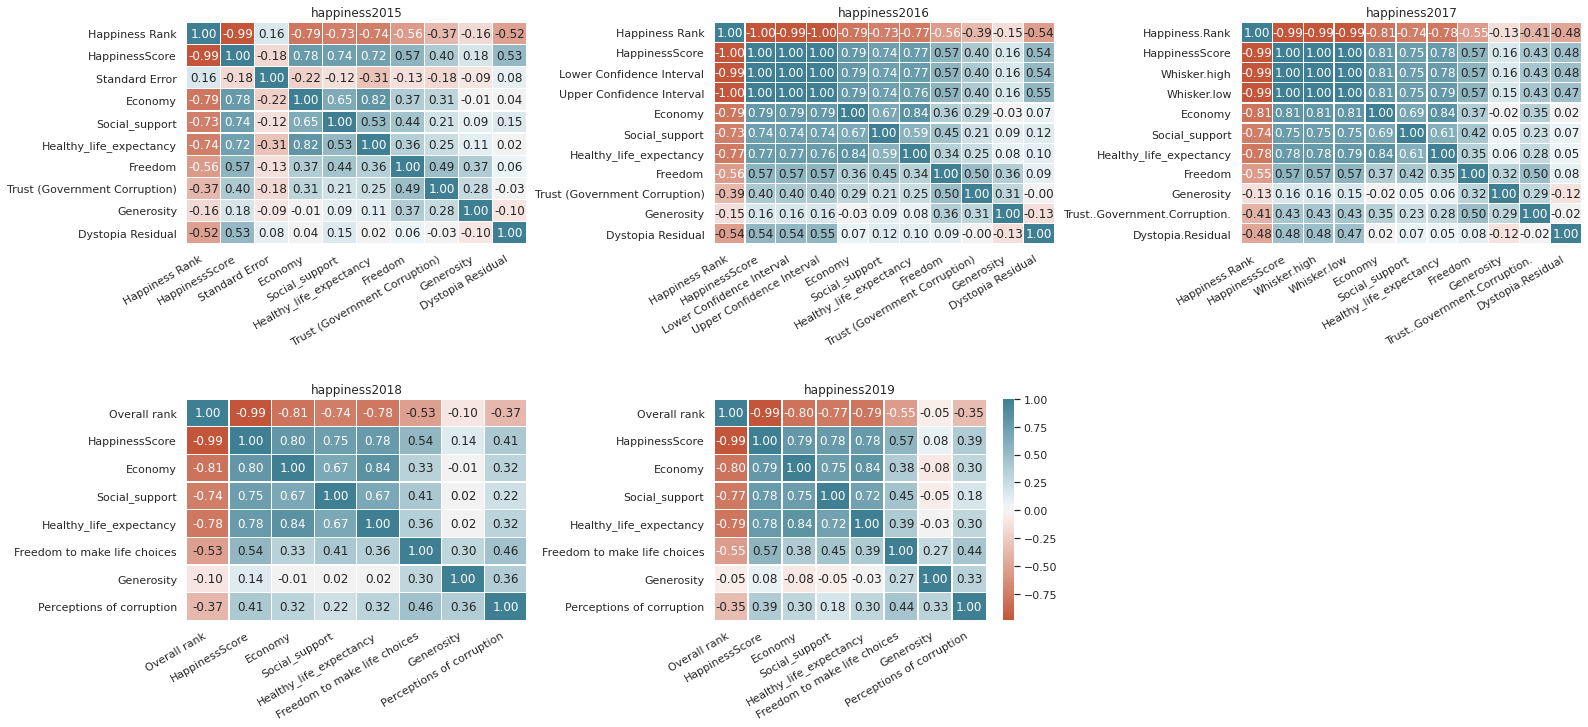

In [5]:
reportNo = 0
cols = 3
rows = 2
set_cbar = False

fig = plt.figure(figsize=(25,11))
fig.subplots_adjust(hspace=0.7, wspace=0.55)

for i in range(1, 6):
      fig.add_subplot(rows, cols, i) 
      report      = [ val for val in reports_dict.values() ][reportNo]
      report_name = [ key for key in reports_dict.keys()   ][reportNo]

      corr= report.corr()

      if i == 5:
        set_cbar=True

      g = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cbar=set_cbar, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(20, 220, n=256))
      g.set_xticklabels( g.get_xticklabels(), rotation=30,  horizontalalignment='right', fontweight='light' )
      g.set( title= report_name)
      reportNo += 1


plt.show()

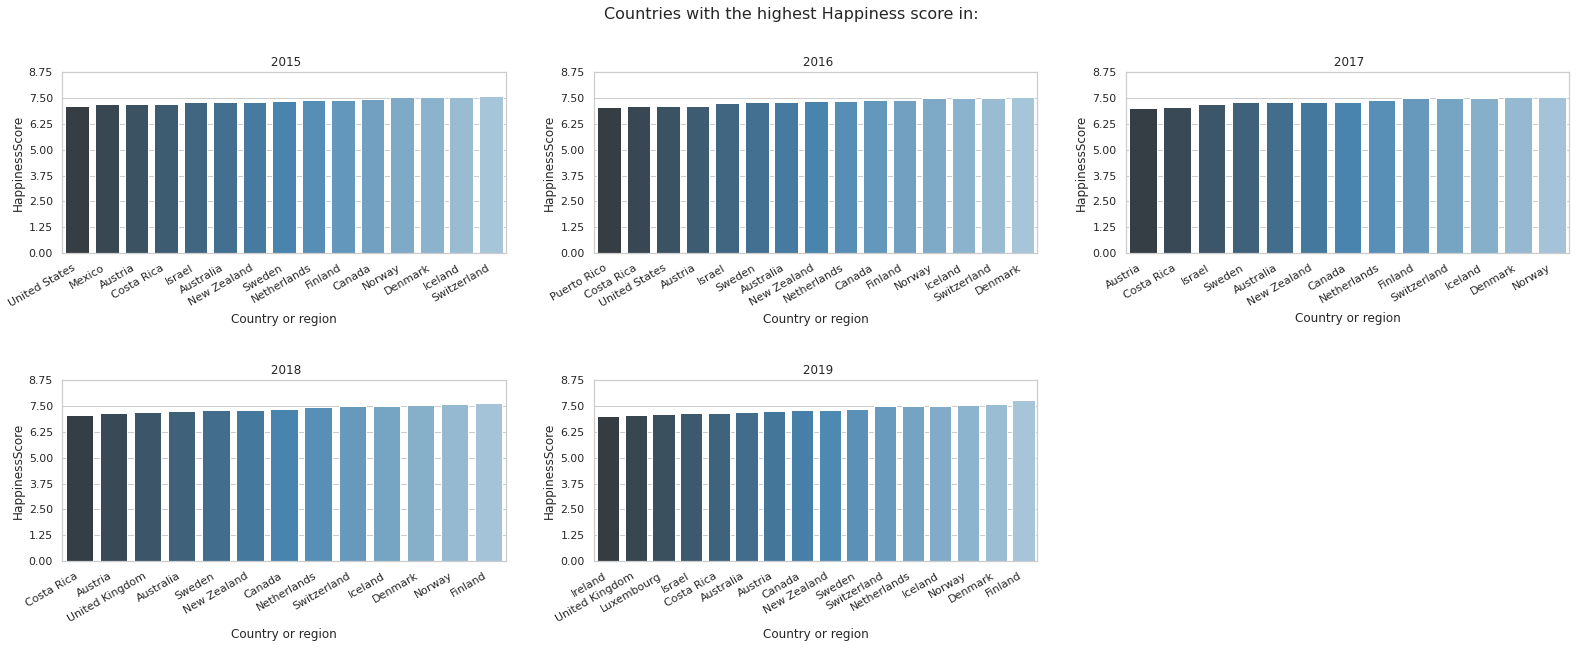

In [6]:
x_data = ['Country', 'Country', 'Country', 'Country or region', 'Country or region' ]

reportNo = 0
cols = 3
rows = 2
x_data_id = 0


fig = plt.figure(figsize=(27,9))
fig.subplots_adjust(hspace=0.7, wspace=0.2)

for i in range(1, 6):
      fig.add_subplot(rows, cols, i) 
      report      = [ val for val in reports_dict.values() ][reportNo]
      report_name = [ key for key in reports_dict.keys()   ][reportNo].split('happiness')[1]

      happinessGreaterthan7 = report['HappinessScore'] >= 7
      Sortedhappiness = report[happinessGreaterthan7].sort_values(by='HappinessScore')


      g = sns.barplot(  data=Sortedhappiness, x='Country or region',  y='HappinessScore', palette='Blues_d'  )

      g.set( xlabel='Country or region', ylabel='HappinessScore', title=' {}'.format(report_name))
      g.set_xticklabels( g.get_xticklabels(), rotation=30,  horizontalalignment='right', fontweight='light' )
      g.set_yticks(np.arange(0, 9, step=1.25))


      fig.suptitle('Countries with the highest Happiness score in:', fontsize=16)

      reportNo  += 1
      x_data_id += 1


plt.show()

In [7]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode

fig = make_subplots(
                    rows=2, cols=3,
                    specs=[[{},   {},       {}],
                          [ {},   {},   None ]], 
                    subplot_titles=('2015', '2016', '2017', '2018', '2019'),
                    print_grid=False)

reportNo = 0
x_data_id = 0

for row in range(1, 3): 
  for col in range(1, 4):
    if (row == 2) and (col == 3):
      row, col = 0, 0
      break  

    report = [ val for val in reports_dict.values() ][reportNo]

    happinessGreaterthan7 = report['HappinessScore'] >= 7
    Sortedhappiness = report[happinessGreaterthan7].sort_values(by='HappinessScore')

    fig.add_trace(go.Bar(x=Sortedhappiness['Country or region'],  y=Sortedhappiness['HappinessScore']), row=row, col=col)

    reportNo  += 1
    x_data_id += 1

fig.update_yaxes(range=[0, 9], dtick=1.25)
fig.update_xaxes(tickangle=-35)
fig.update_layout(showlegend=False, title_text="Countries with the highest Happiness score in:", title_font_size = 25)

#fig.show('svg')
fig.show()

In [8]:
happy_report2015 = create_report_for_one_feature(report2015, 'Country or region', 'HappinessScore')
happy_report2016 = create_report_for_one_feature(report2016, 'Country or region', 'HappinessScore')
happy_report2017 = create_report_for_one_feature(report2017, 'Country or region', 'HappinessScore')
happy_report2018 = create_report_for_one_feature(report2018, 'Country or region', 'HappinessScore')
happy_report2019 = create_report_for_one_feature(report2019, 'Country or region', 'HappinessScore')

happy_AllYears = create_ALLYears_report(happy_report2015, happy_report2016, happy_report2017, happy_report2018, happy_report2019, merge_on='Country or region')


happy_AllYears.head()

,HappinessScore_2015,HappinessScore_2016,HappinessScore_2017,HappinessScore_2018,HappinessScore
Country or region,,,,,
Switzerland,7.587,7.509,7.494,7.487,7.480
Iceland,7.561,7.501,7.504,7.495,7.494
Denmark,7.527,7.526,7.522,7.555,7.600
Norway,7.522,7.498,7.537,7.594,7.554
Canada,7.427,7.404,7.316,7.328,7.278


In [9]:
economy_report2015 = create_report_for_one_feature(report2015, 'Country or region', 'Economy')
economy_report2016 = create_report_for_one_feature(report2016, 'Country or region', 'Economy')
economy_report2017 = create_report_for_one_feature(report2017, 'Country or region', 'Economy')
economy_report2018 = create_report_for_one_feature(report2018, 'Country or region', 'Economy')
economy_report2019 = create_report_for_one_feature(report2019, 'Country or region', 'Economy')

economy_AllYears = create_ALLYears_report(economy_report2015, economy_report2016, economy_report2017, economy_report2018, economy_report2019, merge_on='Country or region')

healthy_report2015 = create_report_for_one_feature(report2015, 'Country or region', 'Healthy_life_expectancy')
healthy_report2016 = create_report_for_one_feature(report2016, 'Country or region', 'Healthy_life_expectancy')
healthy_report2017 = create_report_for_one_feature(report2017, 'Country or region', 'Healthy_life_expectancy')
healthy_report2018 = create_report_for_one_feature(report2018, 'Country or region', 'Healthy_life_expectancy')
healthy_report2019 = create_report_for_one_feature(report2019, 'Country or region', 'Healthy_life_expectancy')

healthy_AllYears = create_ALLYears_report(healthy_report2015, healthy_report2016, healthy_report2017, healthy_report2018, healthy_report2019, merge_on='Country or region')

social_support_report2015 = create_report_for_one_feature(report2015, 'Country or region', 'Social_support')
social_support_report2016 = create_report_for_one_feature(report2016, 'Country or region', 'Social_support')
social_support_report2017 = create_report_for_one_feature(report2017, 'Country or region', 'Social_support')
social_support_report2018 = create_report_for_one_feature(report2018, 'Country or region', 'Social_support')
social_support_report2019 = create_report_for_one_feature(report2019, 'Country or region', 'Social_support')

social_support_AllYears = create_ALLYears_report(social_support_report2015, social_support_report2016, social_support_report2017, social_support_report2018, social_support_report2019, merge_on='Country or region')

Years_list = ['2015', '2016', '2017', '2018', '2019']

happy_newCol_dict          = dict( zip( happy_AllYears.columns,            Years_list          ) )
economy_newCol_dict        = dict( zip( economy_AllYears.columns,          Years_list          ) )
healthy_newCol_dict        = dict( zip( healthy_AllYears.columns,          Years_list          ) )
social_support_newCol_dict = dict( zip( social_support_AllYears.columns,   Years_list          ) )

happy_AllYears             = rename_columns( happy_AllYears,          happy_newCol_dict          )
economy_AllYears           = rename_columns( economy_AllYears,        economy_newCol_dict        )

healthy_AllYears           = rename_columns( healthy_AllYears,        healthy_newCol_dict        )
social_support_AllYears    = rename_columns( social_support_AllYears, social_support_newCol_dict )


happy_AllYears.head()

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,7.587,7.509,7.494,7.487,7.480
Iceland,7.561,7.501,7.504,7.495,7.494
Denmark,7.527,7.526,7.522,7.555,7.600
Norway,7.522,7.498,7.537,7.594,7.554
Canada,7.427,7.404,7.316,7.328,7.278


In [10]:
economy_AllYears.head()

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,1.39651,1.52733,1.564980,1.420,1.452
Iceland,1.30232,1.42666,1.480633,1.343,1.380
Denmark,1.32548,1.44178,1.482383,1.351,1.383
Norway,1.45900,1.57744,1.616463,1.456,1.488
Canada,1.32629,1.44015,1.479204,1.330,1.365


In [11]:
healthy_AllYears.head()

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,0.94143,0.86303,0.858131,0.927,1.052
Iceland,0.94784,0.86733,0.833552,0.914,1.026
Denmark,0.87464,0.79504,0.792566,0.868,0.996
Norway,0.88521,0.79579,0.796667,0.861,1.028
Canada,0.90563,0.82760,0.834558,0.896,1.039


In [12]:
social_support_AllYears.head()

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,1.34951,1.14524,1.516912,1.549,1.526
Iceland,1.40223,1.18326,1.610574,1.644,1.624
Denmark,1.36058,1.16374,1.551122,1.590,1.573
Norway,1.33095,1.12690,1.533524,1.582,1.582
Canada,1.32261,1.09610,1.481349,1.532,1.505


In [13]:
happinessAllYears_stacked = happy_AllYears.stack().to_frame()
happinessAllYears_stacked.reset_index(inplace=True)
happinessAllYears_stacked.head()

,Country or region,level_1,0
0,Switzerland,2015,7.587
1,Switzerland,2016,7.509
2,Switzerland,2017,7.494
3,Switzerland,2018,7.487
4,Switzerland,2019,7.480


In [14]:
newColNames = { 'level_1'  :   'Year',
                        0  :   'HappinessScore'}
happinessAllYears_stacked.rename(columns=newColNames, inplace=True)
happinessAllYears_stacked.columns

Index(['Country or region', 'Year', 'HappinessScore'], dtype='object')

In [15]:
happinessAllYears_stacked = happinessAllYears_stacked.sort_values(by='Country or region')
happinessAllYears_stacked

,Country or region,Year,HappinessScore
679,Afghanistan,2019,3.203
678,Afghanistan,2018,3.632
677,Afghanistan,2017,3.794
676,Afghanistan,2016,3.360
675,Afghanistan,2015,3.575
...,...,...,...
514,Zimbabwe,2019,3.663
510,Zimbabwe,2015,4.610
511,Zimbabwe,2016,4.193
512,Zimbabwe,2017,3.875


In [16]:
happinessAllYearsGreaterThan7 = happinessAllYears_stacked['HappinessScore'] >= 7
happinessAllYears_sorted = happinessAllYears_stacked[happinessAllYearsGreaterThan7].sort_values(by=['HappinessScore'])
happinessAllYears_sorted

,Country or region,Year,HappinessScore
62,Austria,2017,7.006
89,Ireland,2019,7.021
104,United Kingdom,2019,7.054
58,Costa Rica,2018,7.072
57,Costa Rica,2017,7.079
...,...,...,...
0,Switzerland,2015,7.587
18,Norway,2018,7.594
14,Denmark,2019,7.600
28,Finland,2018,7.632


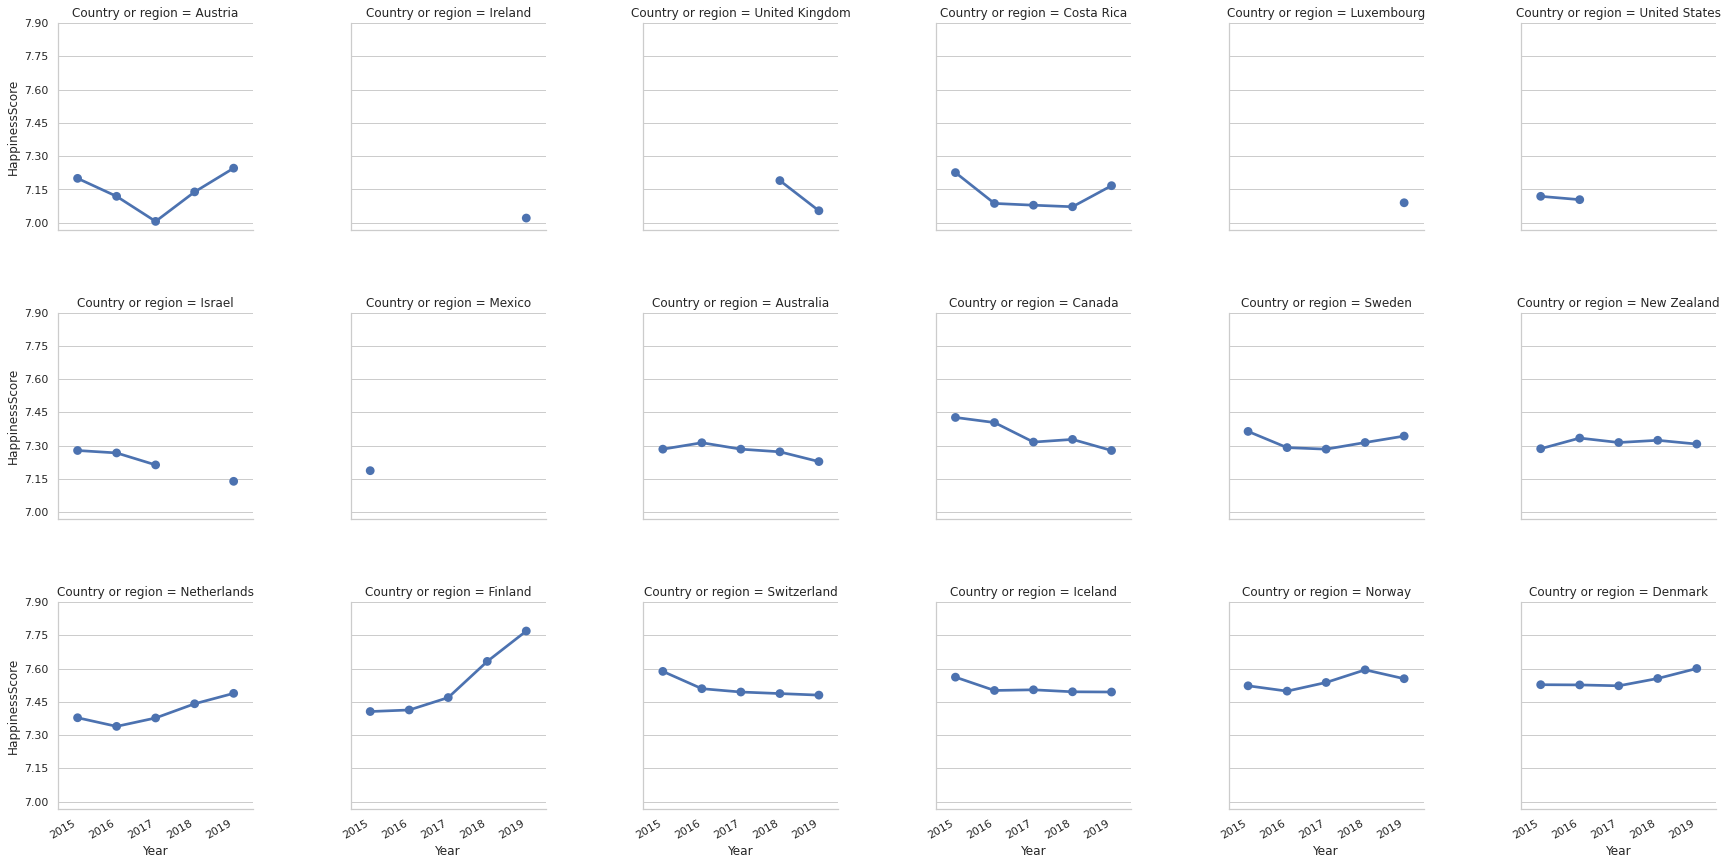

In [17]:
g = sns.catplot(x="Year", y="HappinessScore", col="Country or region", col_wrap=6, kind="point", data=happinessAllYears_sorted, height=4,  aspect=1 )
g.set_xticklabels( rotation=30,  horizontalalignment='right', fontweight='light' )
g.set(yticks=np.arange(7, 8, step=0.15))
plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.show()

In [18]:
happy_AllYears

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,7.587,7.509,7.494,7.487,7.480
Iceland,7.561,7.501,7.504,7.495,7.494
Denmark,7.527,7.526,7.522,7.555,7.600
Norway,7.522,7.498,7.537,7.594,7.554
Canada,7.427,7.404,7.316,7.328,7.278
...,...,...,...,...,...
Rwanda,3.465,3.515,3.471,3.408,3.334
Benin,3.340,3.484,3.657,4.141,4.883
Syria,3.006,3.069,3.462,3.462,3.462


In [19]:
happy_filter_GreaterThan7   =  happy_AllYears          [ ['2015', '2016', '2017', '2018', '2019' ] ] >= 7
economy_filter_GreaterThan7 =  economy_AllYears        [ [ '2015', '2016', '2017', '2018', '2019'] ] >= 1.3
healthy_filter_GreaterThan7 =  healthy_AllYears        [ [ '2015', '2016', '2017', '2018', '2019'] ] >= 0.8
social_filter_GreaterThan7  =  social_support_AllYears [ [ '2015', '2016', '2017', '2018', '2019'] ] >= 0.5

happy_AllYears_sorted       =  happy_AllYears          [ happy_filter_GreaterThan7                  ]
economy_AllYears_sorted     =  economy_AllYears        [ economy_filter_GreaterThan7                ]
healthy_AllYears_sorted     =  healthy_AllYears        [ healthy_filter_GreaterThan7                ]
social_support_sorted       =  social_support_AllYears [ social_filter_GreaterThan7                 ]                       


happy_AllYears_sorted.dropna(inplace=True)
economy_AllYears_sorted.dropna(inplace=True)
healthy_AllYears_sorted.dropna(inplace=True)
social_support_sorted.dropna(inplace=True)

happy_AllYears_sorted.head()

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,7.587,7.509,7.494,7.487,7.480
Iceland,7.561,7.501,7.504,7.495,7.494
Denmark,7.527,7.526,7.522,7.555,7.600
Norway,7.522,7.498,7.537,7.594,7.554
Canada,7.427,7.404,7.316,7.328,7.278


In [20]:
economy_AllYears_sorted.head()

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,1.39651,1.52733,1.564980,1.420,1.452
Iceland,1.30232,1.42666,1.480633,1.343,1.380
Denmark,1.32548,1.44178,1.482383,1.351,1.383
Norway,1.45900,1.57744,1.616463,1.456,1.488
Canada,1.32629,1.44015,1.479204,1.330,1.365


In [21]:
healthy_AllYears_sorted.head()

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,0.94143,0.86303,0.858131,0.927,1.052
Iceland,0.94784,0.86733,0.833552,0.914,1.026
Canada,0.90563,0.82760,0.834558,0.896,1.039
Finland,0.88911,0.81091,0.809158,0.874,0.986
Netherlands,0.89284,0.81231,0.810696,0.878,0.999


In [22]:
social_support_sorted.head()

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,1.34951,1.14524,1.516912,1.549,1.526
Iceland,1.40223,1.18326,1.610574,1.644,1.624
Denmark,1.36058,1.16374,1.551122,1.590,1.573
Norway,1.33095,1.12690,1.533524,1.582,1.582
Canada,1.32261,1.09610,1.481349,1.532,1.505


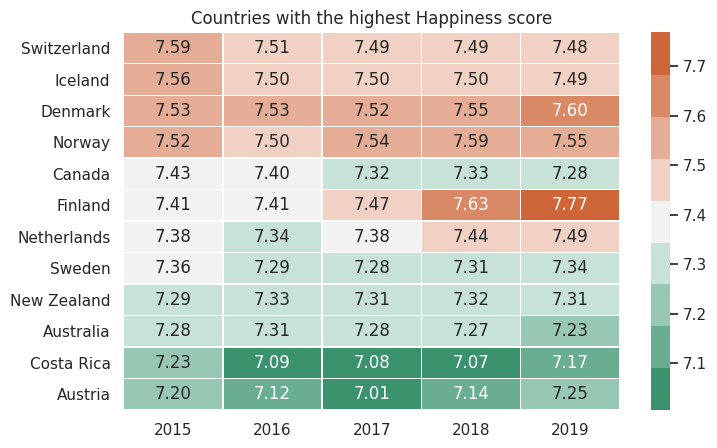

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5), dpi=100)
g = sns.heatmap(happy_AllYears_sorted, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(150, 385, s=80, l=55, n=9))
g.set( title= 'Countries with the highest Happiness score')
ax.set_ylabel('')  
plt.show()